Enter a k-value: 5
[[-1 -9]
 [ 4 -5]
 [ 2 13]
 [ 9  1]
 [-8  3]]


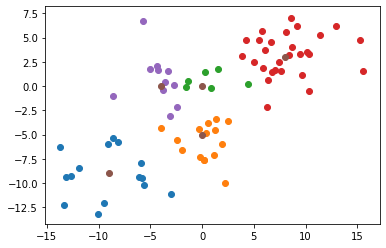

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
from sklearn.datasets import make_blobs

# n_samples: The total number of points equally divided among clusters
# n_features: The number of features for each sample. (i.e. The length of the vectors)
# centers: The number of centers to generate, or the fixed center locations.
# cluster_std: The standard deviation of the clusters.
# optionally you can use center_box which is a bounding box for each 
# cluster center when centers are generated at random.
X, _ = make_blobs(n_samples=75, centers=5, n_features=2, cluster_std=2.2)
# Store data in a pandas dataframe.
df = pd.DataFrame(X)
# Write to a csv file.
df.to_csv('my_data.csv', index=False, header=False)


# Reading in the file
file_path = 'my_data.csv'
data = pd.read_csv(file_path,header=None)
data = data.to_numpy()

# Taking a k-value from a user
k = int(input("Enter a k-value: "))

# Determining Euclidean Distance between each vector x and centroid z
def euclideanDistance(xi, zi):
    return(np.sqrt(np.sum((xi - zi)**2)))

# K-Means
def kMeans(data, k):
    xc = np.random.randint(min(data[:,0]), high=max(data[:,0]), size=k)
    yc = np.random.randint(min(data[:,0]), high=max(data[:,0]), size=k)
    oldCenters = zip(xc, yc)
    clusters = [-1] * len(data)
    newCenters = np.array(list(zip(xc, yc)))
    print(newCenters)

    for a in range(1000):
        for i in range(len(data)):
            temp = []
            for j in range(k):
                temp.append(euclideanDistance(data[i], newCenters[j]))
            clusters[i] = np.argmin(temp)
    
        for i in range(k):
            n, x, y = 0, 0, 0
            for j in range(len(data)):
                if (clusters[j] == i):
                    n += 1
                    x += data[j,0]
                    y += data[j,1]
            x = x / n if n != 0 else 0
            y = y / n if n != 0 else 0
            newCenters[i,0] = x
            newCenters[i,1] = y
    return newCenters, clusters

# Plotting 
def plots(data, k):
    pltCenters, pltClusters = kMeans(data, k)
    for i in range(k):
        arr = []
        for j in range(len(pltClusters)):
            if pltClusters[j] == i:
                arr.append(data[j])
        arr = np.array(arr)
        plt.scatter(arr[:,0], arr[:,1])
    plt.scatter(pltCenters[:,0], pltCenters[:,1])
    plt.show()

plots(data, k)